In [2]:
pip install kaggle

Note: you may need to restart the kernel to use updated packages.


In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d mlg-ulb/creditcardfraud
!unzip creditcardfraud.zip

mkdir: /Users/surajk/.kaggle: File exists
Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


### Import functions

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [9]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

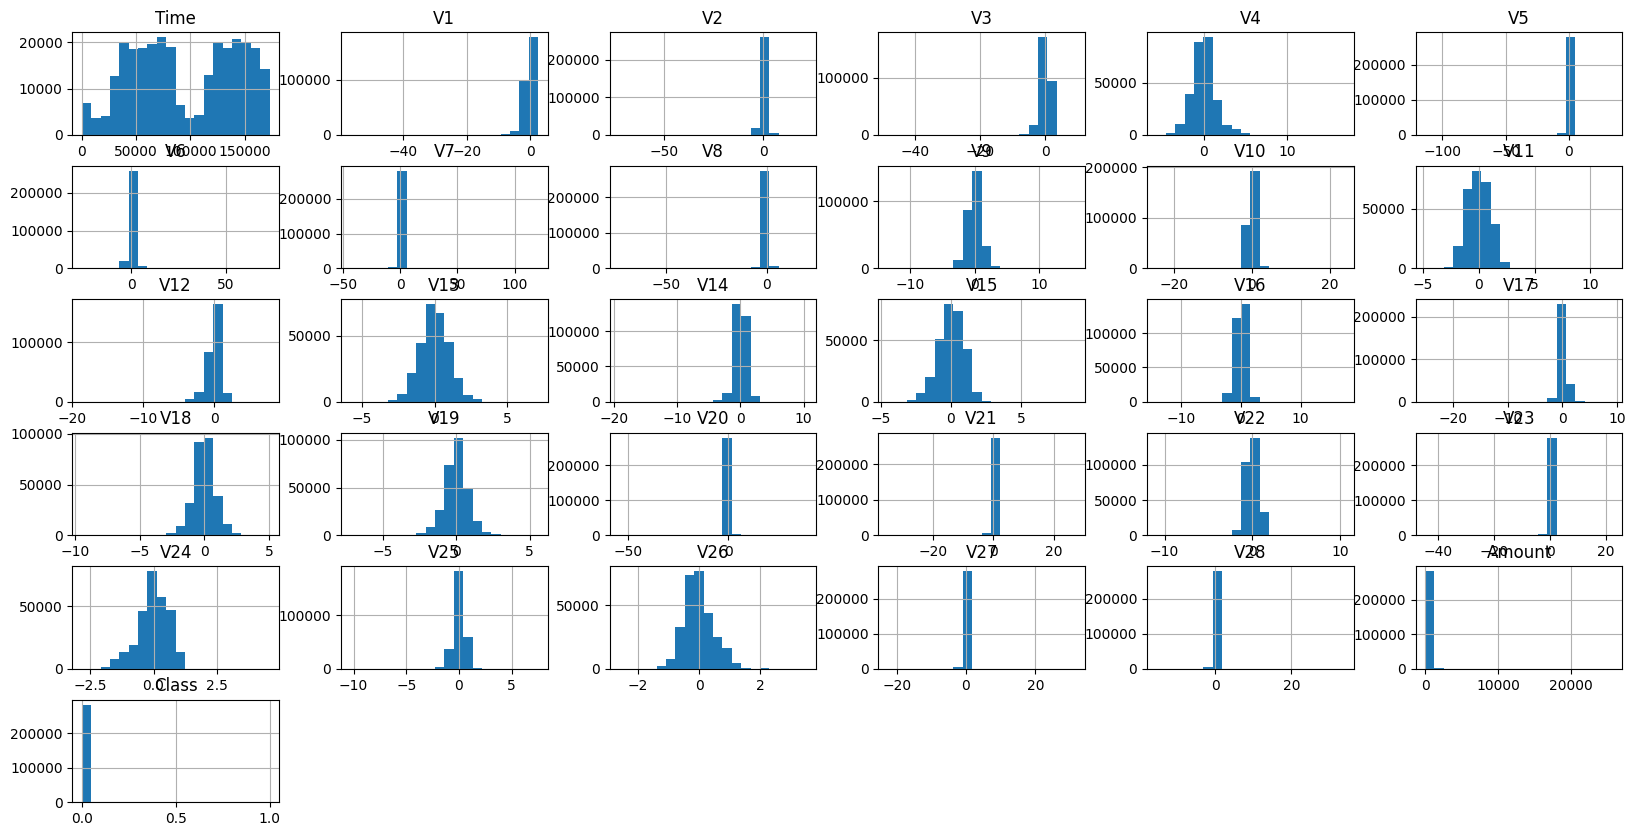

In [10]:
df.hist(figsize=(20,10), bins=20)

In [11]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [18]:
#Robust Scale from sklearn
from sklearn.preprocessing import RobustScaler
new_df = df.copy()
new_df['Amount'] = RobustScaler().fit_transform(new_df['Amount'].to_numpy().reshape(-1,1))
time = new_df['Time']
new_df['Time'] = (time - time.min()) / (time.max() - time.min())

In [20]:
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,0.000006,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,0.000006,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,0.000012,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.999965,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.296653,0
284803,0.999971,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.038986,0
284804,0.999977,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.641096,0
284805,0.999977,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.167680,0


In [21]:
#Shuffle the data before splitting
new_df = new_df.sample(frac=1, random_state=1)
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
169876,0.693938,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,...,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,-0.282401,0
127467,0.453377,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,...,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,-0.279746,0
137900,0.476770,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,...,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,-0.294977,0
21513,0.183556,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,...,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,-0.084119,0
134700,0.468326,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,...,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,-0.296793,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21440,0.183261,-2.986845,-8.663978,-1.910863,0.664058,-3.934875,0.861269,1.647511,-0.480963,-1.546866,...,1.252092,-0.993085,-2.173147,0.145570,-0.235062,-0.227411,-0.382702,0.404045,32.002515,0
117583,0.432480,0.937083,-0.849673,0.524186,-0.020031,-0.606327,0.692302,-0.463724,0.148857,0.785062,...,-0.143322,-0.479981,-0.237902,-0.715247,0.251418,0.975406,-0.060168,0.023771,2.086495,0
73349,0.318852,-1.149963,1.696462,1.637114,2.658991,-0.021502,0.192287,0.205204,0.588754,-1.187820,...,0.025147,0.086506,-0.262748,0.321538,0.341667,0.210343,-0.162047,0.031193,-0.201495,0
267336,0.941757,1.754554,-0.699398,-0.076332,0.443915,-0.672082,0.389061,-0.807534,0.202915,0.858635,...,0.141950,0.358412,0.259748,0.746839,-0.560808,0.104636,-0.005853,-0.019622,1.017257,0


### Train-test Split

In [26]:
#Split the data into train, test, and validation sets
train, test, val = new_df[:240000], new_df[240000:262000], new_df[262000:]
#Value counts for each set
train['Class'].value_counts(), test['Class'].value_counts(), val['Class'].value_counts()


(Class
 0    239589
 1       411
 Name: count, dtype: int64,
 Class
 0    21955
 1       45
 Name: count, dtype: int64,
 Class
 0    22771
 1       36
 Name: count, dtype: int64)

In [27]:
#convert the dataframes to numpy arrays
train_np, test_np, val_np = train.to_numpy(), test.to_numpy(), val.to_numpy()
train_np.shape, test_np.shape, val_np.shape

((240000, 31), (22000, 31), (22807, 31))

In [29]:
#Split the data into X(INPUT) and y(output)

x_train, y_train = train_np[:,:-1], train_np[:,-1] #for input we take all the rows and all the columns except the last one(class)
                                                   #and for test we take all rows and only the last column(class)
#similarly for test and validation
x_test, y_test = test_np[:,:-1], test_np[:,-1]
x_val, y_val = val_np[:,:-1], val_np[:,-1]
#shape of all these
x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_val.shape, y_val.shape


((240000, 30), (240000,), (22000, 30), (22000,), (22807, 30), (22807,))

### Model Predicitions

In [ ]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
logistic_model.score(x_train, y_train)

0.9992375

In [34]:

from sklearn.metrics import classification_report
print(classification_report(y_val, logistic_model.predict(x_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     22771
       Fraud       0.83      0.56      0.67        36

    accuracy                           1.00     22807
   macro avg       0.92      0.78      0.83     22807
weighted avg       1.00      1.00      1.00     22807



Explaining the Confusion metrics:
| | **Predicted Fraud (+)** | **Predicted Not Fraud (-)** |
|-------------------|-------------------------|----------------------------|
| **Fraud (+)** | True Positive | False Negative (recall) |
| **Not Fraud (-)** | False Positive (precision) | True Negative |

In [ ]:
#%pip install tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
#Shallow Neural Network
shallow_nn = Sequential()
shallow_nn.add(InputLayer(input_shape=(x_train.shape[1],)))
shallow_nn.add(Dense(2, activation='relu'))
shallow_nn.add(BatchNormalization())
shallow_nn.add(Dense(1, activation='sigmoid')) #output a value between 0 and 1

checkpoint = ModelCheckpoint('shallow_nn.keras', save_best_only=True)
shallow_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [37]:
shallow_nn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 2)              │            62 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 2)              │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73 (292.00 B)

 Trainable params: 69 (276.00 B)

 Non-trainable params: 4 (16.00 B)

In [38]:
shallow_nn.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=5, callbacks=[checkpoint])

Epoch 1/5
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 5s 557us/step - accuracy: 0.9172 - loss: 0.1726 - val_accuracy: 0.9991 - val_loss: 0.0059
Epoch 2/5
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 4s 516us/step - accuracy: 0.9992 - loss: 0.0037 - val_accuracy: 0.9991 - val_loss: 0.0055
Epoch 3/5
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 4s 539us/step - accuracy: 0.9993 - loss: 0.0037 - val_accuracy: 0.9987 - val_loss: 0.0073
Epoch 4/5
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 4s 481us/step - accuracy: 0.9993 - loss: 0.0032 - val_accuracy: 0.9991 - val_loss: 0.0039
Epoch 5/5
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 4s 563us/step - accuracy: 0.9993 - loss: 0.0032 - val_accuracy: 0.9989 - val_loss: 0.0040


In [ ]:
#convert ** into a function
def neural_net_predictions(model, x):
    return (shallow_nn.predict(x).flatten() >0.5).astype(int)

In [44]:
neural_net_predictions(shallow_nn, x_val)

713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step


array([0, 0, 0, ..., 0, 0, 0])

In [45]:
print(classification_report(y_val, neural_net_predictions(shallow_nn, x_val), target_names=['Not Fraud', 'Fraud']))

713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 276us/step
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     22771
       Fraud       0.64      0.78      0.70        36

    accuracy                           1.00     22807
   macro avg       0.82      0.89      0.85     22807
weighted avg       1.00      1.00      1.00     22807



In [46]:
#random forest Model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=2, n_jobs=-1)
rf.fit(x_train, y_train)

print(classification_report(y_val, rf.predict(x_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     22771
       Fraud       0.81      0.47      0.60        36

    accuracy                           1.00     22807
   macro avg       0.90      0.74      0.80     22807
weighted avg       1.00      1.00      1.00     22807



In [47]:
#gradient boosting Model
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=1, random_state=0)
gbc.fit(x_train, y_train)
print(classification_report(y_val, gbc.predict(x_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     22771
       Fraud       0.67      0.67      0.67        36

    accuracy                           1.00     22807
   macro avg       0.83      0.83      0.83     22807
weighted avg       1.00      1.00      1.00     22807



In [48]:
#support vector machine
from sklearn.svm import SVC
svc = SVC(class_weight='balanced')
svc.fit(x_train, y_train)
print(classification_report(y_val, svc.predict(x_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     22771
       Fraud       0.27      0.83      0.41        36

    accuracy                           1.00     22807
   macro avg       0.63      0.91      0.70     22807
weighted avg       1.00      1.00      1.00     22807



Results from above Classification reports:<br>

| | **P** | **R** | **f-1** |
|-------------------------|---------|--------|------|
| **Logistic on Val:** | 0.83 | 0.56 | 0.67 |
| **shallow_nn on val:** | 0.64 | 0.78 | 0.70 |
| **random forest on val:** | 0.81 |     0.47  |    0.60|
| **Gradient boosting on val:** | 0.67   |   0.67   |   0.67 |
|**Linear SVM on val:**| 0.27  |    0.83   |   0.41   | 

 Downsampling

In [ ]:
#downsampling

In [49]:
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
169876,0.693938,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,...,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,-0.282401,0
127467,0.453377,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,...,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,-0.279746,0
137900,0.476770,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,...,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,-0.294977,0
21513,0.183556,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,...,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,-0.084119,0
134700,0.468326,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,...,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,-0.296793,0


In [50]:
frauds = new_df[new_df['Class'] == 1]
non_frauds = new_df[new_df['Class'] == 0]
non_frauds['Class'].value_counts(), frauds['Class'].value_counts()

(Class
 0    284315
 Name: count, dtype: int64,
 Class
 1    492
 Name: count, dtype: int64)

In [52]:
balanced_df = pd.concat([frauds, non_frauds.sample(n=len(frauds), random_state=1)])
balanced_df['Class'].value_counts()

Class
1    492
0    492
Name: count, dtype: int64

In [54]:
balanced_df = balanced_df.sample(frac=1, random_state=1)
balanced_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
82218,0.343210,-0.556363,0.551155,0.396888,-0.613374,2.625665,3.455931,-0.114063,0.926993,-0.897010,...,-0.234708,-0.927613,-0.139945,1.001983,0.162194,0.290751,0.031490,0.073939,-0.293579,0
61398,0.288289,0.867259,-1.102619,0.755843,-1.247454,-1.342233,-0.188102,-0.619857,0.160729,1.616782,...,0.303840,0.795195,-0.203847,0.312332,0.304205,0.096678,0.030060,0.039615,1.942290,0
15781,0.157525,-25.266355,14.323254,-26.823673,6.349248,-18.664251,-4.647403,-17.971212,16.633103,-3.768351,...,1.780701,-1.861318,-1.188167,0.156667,1.768192,-0.219916,1.411855,0.414656,1.089779,1
228225,0.841526,2.073845,0.181244,-1.718981,0.402900,0.479184,-0.838896,0.218851,-0.259657,0.428613,...,-0.361264,-0.918761,0.325352,0.494532,-0.236625,0.173155,-0.060315,-0.029544,-0.244673,0
173437,0.703048,2.250138,-0.717302,-1.540466,-1.045171,-0.108440,-0.599912,-0.313935,-0.305839,-0.390386,...,-0.121100,-0.307016,0.145089,-1.057831,-0.039380,-0.340957,-0.025841,-0.065088,0.013275,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165227,0.678799,2.075661,0.768931,-3.025710,0.787094,1.182225,-1.753926,0.881698,-0.536391,-0.141567,...,-0.029613,0.171650,-0.002079,0.942566,0.369385,0.658446,-0.071925,-0.007733,-0.296793,0
20198,0.178550,-2.830984,0.885657,1.199930,2.861292,0.321669,0.289966,1.767760,-2.451050,0.069736,...,0.546589,0.334971,0.172106,0.623590,-0.527114,-0.079215,-2.532445,0.311177,1.157130,1
6717,0.048660,-1.813280,4.917851,-5.926130,5.701500,1.204393,-3.035138,-1.713402,0.561257,-3.796354,...,0.615642,-0.406427,-0.737018,-0.279642,1.106766,0.323885,0.894767,0.569519,-0.293440,1
155825,0.616307,1.990782,-0.131333,-0.139775,0.537478,-0.588547,-0.706836,-0.532783,-0.173258,2.574530,...,-0.260028,-0.345248,0.368608,-0.127376,-0.398182,-0.960453,0.037125,-0.033214,-0.277789,0


In [57]:
#convert the balanced dataframe to numpy array

balanced_df_np = balanced_df.to_numpy()

# Now slice the numpy array properly
x_train_b, y_train_b = balanced_df_np[:700, :-1], balanced_df_np[:700, -1]
# Same for test and validation
x_test_b, y_test_b = balanced_df_np[700:842, :-1], balanced_df_np[700:842, -1]
x_val_b, y_val_b = balanced_df_np[842:, :-1], balanced_df_np[842:, -1]

# Check the shapes
x_train_b.shape, y_train_b.shape, x_test_b.shape, y_test_b.shape, x_val_b.shape, y_val_b.shape


((700, 30), (700,), (142, 30), (142,), (142, 30), (142,))

In [59]:
pd.Series(y_train_b).value_counts(), pd.Series(y_test_b).value_counts(), pd.Series(y_val_b).value_counts()

(0.0    358
 1.0    342
 Name: count, dtype: int64,
 1.0    74
 0.0    68
 Name: count, dtype: int64,
 1.0    76
 0.0    66
 Name: count, dtype: int64)

### Rerun all the Models we created earlier

In [61]:
# Logistic Regression

logistic_model_b = LogisticRegression()
logistic_model_b.fit(x_train_b, y_train_b)
logistic_model_b.score(x_train_b, y_train_b)

print(classification_report(y_val_b, logistic_model_b.predict(x_val_b), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.84      0.95      0.89        66
       Fraud       0.96      0.84      0.90        76

    accuracy                           0.89       142
   macro avg       0.90      0.90      0.89       142
weighted avg       0.90      0.89      0.89       142



In [62]:
#shallow Neural Network

shallow_nn_b = Sequential()
shallow_nn_b.add(InputLayer(input_shape=(x_train.shape[1],)))
shallow_nn_b.add(Dense(2, activation='relu'))
shallow_nn_b.add(BatchNormalization())
shallow_nn_b.add(Dense(1, activation='sigmoid')) #output a value between 0 and 1

checkpoint = ModelCheckpoint('shallow_nn_b.keras', save_best_only=True)
shallow_nn_b.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

shallow_nn_b.fit(x_train_b, y_train_b, validation_data=(x_val_b, y_val_b), epochs=5, callbacks=[checkpoint])

Epoch 1/5


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4098 - loss: 0.9503 - val_accuracy: 0.5775 - val_loss: 0.6652
Epoch 2/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5592 - loss: 0.7365 - val_accuracy: 0.6901 - val_loss: 0.5646
Epoch 3/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6655 - loss: 0.6627 - val_accuracy: 0.7394 - val_loss: 0.5216
Epoch 4/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6900 - loss: 0.6127 - val_accuracy: 0.7676 - val_loss: 0.4978
Epoch 5/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7452 - loss: 0.5202 - val_accuracy: 0.7958 - val_loss: 0.4855


In [63]:
print(classification_report(y_val_b, neural_net_predictions(shallow_nn_b, x_val_b), target_names=['Not Fraud', 'Fraud']))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
              precision    recall  f1-score   support

   Not Fraud       0.77      1.00      0.87        66
       Fraud       1.00      0.74      0.85        76

    accuracy                           0.86       142
   macro avg       0.88      0.87      0.86       142
weighted avg       0.89      0.86      0.86       142



In [65]:
# Shallow NN is overfitting so lets try it again

shallow_nn_b1 = Sequential()
shallow_nn_b1.add(InputLayer(input_shape=(x_train.shape[1],)))
shallow_nn_b1.add(Dense(1, activation='relu'))
shallow_nn_b1.add(BatchNormalization())
shallow_nn_b1.add(Dense(1, activation='sigmoid')) #output a value between 0 and 1

checkpoint = ModelCheckpoint('shallow_nn_b.keras', save_best_only=True)
shallow_nn_b1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

shallow_nn_b1.fit(x_train_b, y_train_b, validation_data=(x_val_b, y_val_b), epochs=40, callbacks=[checkpoint])

Epoch 1/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4999 - loss: 0.7361 - val_accuracy: 0.4930 - val_loss: 0.6833
Epoch 2/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6587 - loss: 0.6102 - val_accuracy: 0.5493 - val_loss: 0.6270
Epoch 3/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6962 - loss: 0.5839 - val_accuracy: 0.5986 - val_loss: 0.6025
Epoch 4/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7179 - loss: 0.5679 - val_accuracy: 0.5986 - val_loss: 0.5892
Epoch 5/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7331 - loss: 0.5400 - val_accuracy: 0.6338 - val_loss: 0.5795
Epoch 6/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7687 - loss: 0.5233 - val_accuracy: 0.6690 - val_loss: 0.5710
Epoch 7/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7528 - loss: 0.5495 - val_accuracy: 0.6831 - val_loss: 0.5627
Epoch 8/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7927 - loss: 0.5195 - val_accuracy: 0.6901 - val_loss:

In [66]:
print(classification_report(y_val_b, neural_net_predictions(shallow_nn_b1, x_val_b), target_names=['Not Fraud', 'Fraud']))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
              precision    recall  f1-score   support

   Not Fraud       0.77      1.00      0.87        66
       Fraud       1.00      0.74      0.85        76

    accuracy                           0.86       142
   macro avg       0.88      0.87      0.86       142
weighted avg       0.89      0.86      0.86       142



In [67]:
#Gradient Boosting Classifier
gbc_b = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=2, random_state=0)
gbc_b.fit(x_train_b, y_train_b)
print(classification_report(y_val_b, gbc_b.predict(x_val_b), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.86      0.92      0.89        66
       Fraud       0.93      0.87      0.90        76

    accuracy                           0.89       142
   macro avg       0.89      0.90      0.89       142
weighted avg       0.90      0.89      0.89       142



In [68]:
#Support Vector Machine
svc_b = SVC(class_weight='balanced')
svc_b.fit(x_train_b, y_train_b)
print(classification_report(y_val_b, svc_b.predict(x_val_b), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.83      0.97      0.90        66
       Fraud       0.97      0.83      0.89        76

    accuracy                           0.89       142
   macro avg       0.90      0.90      0.89       142
weighted avg       0.91      0.89      0.89       142



In [71]:
#print(classification_report(y_test_b, logistic_model_b.predict(x_test_b), target_names=['Not Fraud', 'Fraud']))

print(classification_report(y_test_b, neural_net_predictions(shallow_nn, x_test_b), target_names=['Not Fraud', 'Fraud']))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
              precision    recall  f1-score   support

   Not Fraud       0.79      1.00      0.88        68
       Fraud       1.00      0.76      0.86        74

    accuracy                           0.87       142
   macro avg       0.90      0.88      0.87       142
weighted avg       0.90      0.87      0.87       142

